# Home 4: Build a CNN for image recognition.

### Name: Xing Fang


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2020S/blob/master/homework/HM4/HM4.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [2]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
import numpy as np
def to_one_hot(y, num_class=10):
    results = np.zeros([(len(y)), num_class])
    for i, label in enumerate(y):
        results[i, label] = 1
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

### Baseline model


In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256 

In [6]:
from keras import optimizers

learning_rate = 1E-5 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [7]:
history = model.fit(x_tr, y_tr,  
           epochs=60, 
           verbose = 1,
           validation_data = (x_val, y_val)
               )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/60
40000/40000 [==============================] - 31s 773us/step - loss: 2.1598 - acc: 0.2171 - val_loss: 1.7682 - val_acc: 0.3875
Epoch 2/60
40000/40000 [==============================] - 24s 601us/step - loss: 1.8700 - acc: 0.3166 - val_loss: 1.6091 - val_acc: 0.4365
Epoch 3/60
40000/40000 [==============================] - 24s 603us/step - loss: 1.7257 - acc: 0.3640 - val_loss: 1.5039 - val_acc: 0.4657
Epoch 4/60
40000/40000 [==============================] - 24s 606us/step - loss: 1.6373 - acc: 0.3999 - val_loss: 1.4294 - val_acc: 0.4960
Epoch 5/60
40000/40000 [==============================] - 24s 604us/step - loss: 1.5682 - acc: 0.4241 - val_loss: 1.3787 - val_acc: 0.5113
Epoch 6/60
40000/40000 [==============================] - 24s 603us/step - loss: 1.5111 - acc: 0.4471 - val_loss: 1.3377 - val_acc: 0.5218
Epoch 7/60
40000/400

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_train_val_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

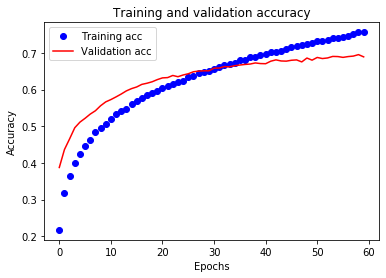

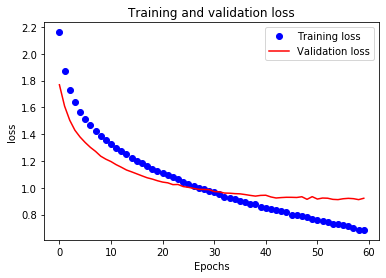

In [9]:
plot_train_val_acc(history)

### 1.Tune structure of the model

In [0]:
def create_model(dropout_rate = 0.5,lr = 1e-2 ):
    
    #build model
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation("relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr = lr),
                metrics=['acc'])
    return model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model, batch_size = 1000, epochs = 30)

In [0]:
lr = [1e-2, 1e-3, 1e-4]
dropout_rate = [0.3, 0.5, 0.7]
param_grid = dict(lr = lr, dropout_rate = dropout_rate)

In [0]:
from sklearn.model_selection import RandomizedSearchCV, KFold
grid = RandomizedSearchCV(estimator = model, cv = KFold(5), 
              param_distributions = param_grid,
              verbose = 20, 
              n_iter = 10, n_jobs = 1)

In [14]:
grid_result = grid.fit(x_train, y_train_vec)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] lr=0.01, dropout_rate=0.3 .......................................
Epoch 1/30
40000/40000 [==============================] - 7s 172us/step - loss: 3.7218 - acc: 0.1365
Epoch 2/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.9680 - acc: 0.2621
Epoch 3/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.7191 - acc: 0.3516
Epoch 4/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.5314 - acc: 0.4310
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3763 - acc: 0.4901
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.2357 - acc: 0.5499
Epoch 7/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.1306 - acc: 0.5874
Epoch 8/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0282 - acc: 0.6301
Epoch 9/30
40000/40000 [==============================] - 5s 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 6s 149us/step - loss: 3.9443 - acc: 0.1132
Epoch 2/30
40000/40000 [==============================] - 5s 122us/step - loss: 2.0649 - acc: 0.2288
Epoch 3/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.7534 - acc: 0.3351
Epoch 4/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.5478 - acc: 0.4187
Epoch 5/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.3766 - acc: 0.4897
Epoch 6/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.2451 - acc: 0.5418
Epoch 7/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.1397 - acc: 0.5880
Epoch 8/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0400 - acc: 0.6236
Epoch 9/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.9427 - acc: 0.6612
Epoch 10/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.8605 - a

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.0min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 6s 155us/step - loss: 3.4553 - acc: 0.1232
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 2.0526 - acc: 0.2014
Epoch 3/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.8214 - acc: 0.3031
Epoch 4/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.6079 - acc: 0.3902
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.4438 - acc: 0.4636
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.2950 - acc: 0.5240
Epoch 7/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1650 - acc: 0.5759
Epoch 8/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0588 - acc: 0.6190
Epoch 9/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.9609 - acc: 0.6562
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.8777 - a

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.5min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 6s 161us/step - loss: 3.8744 - acc: 0.1217
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 2.0676 - acc: 0.2274
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.7553 - acc: 0.3373
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.5420 - acc: 0.4272
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3728 - acc: 0.4937
Epoch 6/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.2364 - acc: 0.5464
Epoch 7/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.1182 - acc: 0.5974
Epoch 8/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0120 - acc: 0.6369
Epoch 9/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.9194 - acc: 0.6726
Epoch 10/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.8378 - a

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 10.0min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 7s 168us/step - loss: 3.4886 - acc: 0.1313
Epoch 2/30
40000/40000 [==============================] - 5s 122us/step - loss: 2.0062 - acc: 0.2288
Epoch 3/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.7778 - acc: 0.3262
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.5477 - acc: 0.4200
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3902 - acc: 0.4852
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.2614 - acc: 0.5388
Epoch 7/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1428 - acc: 0.5823
Epoch 8/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0414 - acc: 0.6221
Epoch 9/30
40000/40000 [==============================] - 5s 124us/step - loss: 0.9457 - acc: 0.6627
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.8648 - a

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 12.6min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 7s 170us/step - loss: 1.7617 - acc: 0.3667
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3208 - acc: 0.5113
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1434 - acc: 0.5839
Epoch 4/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0047 - acc: 0.6383
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.8993 - acc: 0.6797
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.8159 - acc: 0.7096
Epoch 7/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.7538 - acc: 0.7297
Epoch 8/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.6799 - acc: 0.7586
Epoch 9/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.6154 - acc: 0.7843
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.5692 - a

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 15.1min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 7s 175us/step - loss: 1.7776 - acc: 0.3620
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3387 - acc: 0.5083
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1658 - acc: 0.5749
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0347 - acc: 0.6260
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.9343 - acc: 0.6655
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.8383 - acc: 0.7011
Epoch 7/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.7660 - acc: 0.7284
Epoch 8/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.6966 - acc: 0.7524
Epoch 9/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.6434 - acc: 0.7743
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.5844 - a

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 17.6min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 7s 181us/step - loss: 1.7747 - acc: 0.3655
Epoch 2/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.3295 - acc: 0.5087
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1461 - acc: 0.5835
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0218 - acc: 0.6319
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.9187 - acc: 0.6707
Epoch 6/30
40000/40000 [==============================] - 5s 124us/step - loss: 0.8336 - acc: 0.7041
Epoch 7/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.7651 - acc: 0.7280
Epoch 8/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.6879 - acc: 0.7553
Epoch 9/30
40000/40000 [==============================] - 5s 124us/step - loss: 0.6356 - acc: 0.7730
Epoch 10/30
40000/40000 [==============================] - 5s 124us/step - loss: 0.5871 - a

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 20.2min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 8s 189us/step - loss: 1.7716 - acc: 0.3596
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3365 - acc: 0.5076
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1488 - acc: 0.5830
Epoch 4/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0286 - acc: 0.6276
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.9252 - acc: 0.6685
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.8329 - acc: 0.7040
Epoch 7/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.7625 - acc: 0.7276
Epoch 8/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.7002 - acc: 0.7482
Epoch 9/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.6393 - acc: 0.7721
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.5948 - a

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 22.7min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 8s 196us/step - loss: 1.7495 - acc: 0.3740
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3097 - acc: 0.5202
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1284 - acc: 0.5919
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0001 - acc: 0.6375
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.8896 - acc: 0.6836
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.8161 - acc: 0.7091
Epoch 7/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.7439 - acc: 0.7333
Epoch 8/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.6772 - acc: 0.7579
Epoch 9/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.6254 - acc: 0.7776
Epoch 10/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.5710 - a

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 25.3min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 8s 195us/step - loss: 1.9265 - acc: 0.3120
Epoch 2/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.5916 - acc: 0.4207
Epoch 3/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.4338 - acc: 0.4764
Epoch 4/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.3342 - acc: 0.5133
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.2666 - acc: 0.5413
Epoch 6/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.2051 - acc: 0.5643
Epoch 7/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.1544 - acc: 0.5846
Epoch 8/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.1084 - acc: 0.6020
Epoch 9/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0682 - acc: 0.6184
Epoch 10/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0302 - a

[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 27.8min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 8s 203us/step - loss: 1.8947 - acc: 0.3117
Epoch 2/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.5688 - acc: 0.4282
Epoch 3/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.4233 - acc: 0.4829
Epoch 4/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.3270 - acc: 0.5207
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.2549 - acc: 0.5442
Epoch 6/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.1956 - acc: 0.5708
Epoch 7/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.1428 - acc: 0.5897
Epoch 8/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0975 - acc: 0.6059
Epoch 9/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0556 - acc: 0.6205
Epoch 10/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0219 - a

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 30.4min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 8s 209us/step - loss: 1.9208 - acc: 0.3064
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.5603 - acc: 0.4353
Epoch 3/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.4048 - acc: 0.4903
Epoch 4/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.2984 - acc: 0.5314
Epoch 5/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.2136 - acc: 0.5646
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1558 - acc: 0.5847
Epoch 7/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0972 - acc: 0.6068
Epoch 8/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0519 - acc: 0.6218
Epoch 9/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0122 - acc: 0.6393
Epoch 10/30
40000/40000 [==============================] - 5s 124us/step - loss: 0.9677 - a

[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 33.0min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 9s 214us/step - loss: 1.9349 - acc: 0.2958
Epoch 2/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.5599 - acc: 0.4264
Epoch 3/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.4125 - acc: 0.4859
Epoch 4/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.3073 - acc: 0.5263
Epoch 5/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.2381 - acc: 0.5514
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.1775 - acc: 0.5770
Epoch 7/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.1210 - acc: 0.5969
Epoch 8/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0750 - acc: 0.6139
Epoch 9/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0366 - acc: 0.6286
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.9922 - a

[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 35.6min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 9s 219us/step - loss: 1.8908 - acc: 0.3174
Epoch 2/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.5592 - acc: 0.4358
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.4059 - acc: 0.4905
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3067 - acc: 0.5284
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.2274 - acc: 0.5600
Epoch 6/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.1659 - acc: 0.5802
Epoch 7/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.1169 - acc: 0.6005
Epoch 8/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0689 - acc: 0.6173
Epoch 9/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0329 - acc: 0.6323
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.9938 - a

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 38.1min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 9s 226us/step - loss: 3.8905 - acc: 0.1102
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 2.1150 - acc: 0.1993
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.8111 - acc: 0.3097
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.6289 - acc: 0.3880
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.4664 - acc: 0.4573
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3406 - acc: 0.5054
Epoch 7/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.2455 - acc: 0.5415
Epoch 8/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.1440 - acc: 0.5847
Epoch 9/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0528 - acc: 0.6182
Epoch 10/30
40000/40000 [==============================] - 5s 122us/step - loss: 0.9678 - a

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 40.7min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 9s 231us/step - loss: 3.7977 - acc: 0.1143
Epoch 2/30
40000/40000 [==============================] - 5s 124us/step - loss: 2.0919 - acc: 0.2079
Epoch 3/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.7938 - acc: 0.3208
Epoch 4/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.5855 - acc: 0.4021
Epoch 5/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.4305 - acc: 0.4626
Epoch 6/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.3086 - acc: 0.5203
Epoch 7/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.2075 - acc: 0.5567
Epoch 8/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0927 - acc: 0.6030
Epoch 9/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0029 - acc: 0.6440
Epoch 10/30
40000/40000 [==============================] - 5s 124us/step - loss: 0.9286 - a

[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 43.3min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 9s 236us/step - loss: 3.9346 - acc: 0.1242
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 2.0642 - acc: 0.2033
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.8353 - acc: 0.2908
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.6306 - acc: 0.3723
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.4690 - acc: 0.4505
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3212 - acc: 0.5102
Epoch 7/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.2030 - acc: 0.5663
Epoch 8/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0888 - acc: 0.6081
Epoch 9/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.0077 - acc: 0.6393
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.9231 - a

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 45.9min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 10s 241us/step - loss: 4.1138 - acc: 0.1106
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 2.1995 - acc: 0.1627
Epoch 3/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.8898 - acc: 0.2704
Epoch 4/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.6599 - acc: 0.3632
Epoch 5/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.4697 - acc: 0.4409
Epoch 6/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.3363 - acc: 0.5034
Epoch 7/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.2082 - acc: 0.5546
Epoch 8/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0965 - acc: 0.6023
Epoch 9/30
40000/40000 [==============================] - 5s 123us/step - loss: 1.0181 - acc: 0.6352
Epoch 10/30
40000/40000 [==============================] - 5s 123us/step - loss: 0.9156 - 

[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 48.5min remaining:    0.0s


Epoch 1/30
40000/40000 [==============================] - 10s 250us/step - loss: 3.3105 - acc: 0.1338
Epoch 2/30
40000/40000 [==============================] - 5s 123us/step - loss: 2.0213 - acc: 0.2255
Epoch 3/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.7727 - acc: 0.3200
Epoch 4/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.5827 - acc: 0.4002
Epoch 5/30
40000/40000 [==============================] - 5s 125us/step - loss: 1.4304 - acc: 0.4676
Epoch 6/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.3045 - acc: 0.5236
Epoch 7/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.1933 - acc: 0.5664
Epoch 8/30
40000/40000 [==============================] - 5s 125us/step - loss: 1.0941 - acc: 0.6047
Epoch 9/30
40000/40000 [==============================] - 5s 124us/step - loss: 1.0162 - acc: 0.6335
Epoch 10/30
40000/40000 [==============================] - 5s 124us/step - loss: 0.9423 - 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 119.3min finished


Epoch 1/30
50000/50000 [==============================] - 17s 342us/step - loss: 1.7286 - acc: 0.3736
Epoch 2/30
50000/50000 [==============================] - 6s 127us/step - loss: 1.2662 - acc: 0.5363
Epoch 3/30
50000/50000 [==============================] - 6s 126us/step - loss: 1.0727 - acc: 0.6125
Epoch 4/30
50000/50000 [==============================] - 6s 126us/step - loss: 0.9541 - acc: 0.6598
Epoch 5/30
50000/50000 [==============================] - 6s 126us/step - loss: 0.8493 - acc: 0.6977
Epoch 6/30
50000/50000 [==============================] - 6s 127us/step - loss: 0.7654 - acc: 0.7287
Epoch 7/30
50000/50000 [==============================] - 6s 127us/step - loss: 0.6981 - acc: 0.7531
Epoch 8/30
50000/50000 [==============================] - 6s 127us/step - loss: 0.6308 - acc: 0.7777
Epoch 9/30
50000/50000 [==============================] - 6s 127us/step - loss: 0.5768 - acc: 0.7979
Epoch 10/30
50000/50000 [==============================] - 6s 127us/step - loss: 0.5289 - 

In [15]:
print(grid_result.best_params_)

{'lr': 0.001, 'dropout_rate': 0.3}


In [0]:
best_model = grid_result.best_estimator_


## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [0]:
best_model = grid_result.best_estimator_

In [29]:

history = best_model.fit(x_train, y_train_vec,  
           epochs=60, 
           verbose = 1,
           validation_data = (x_tr, y_tr)
               )

Train on 50000 samples, validate on 40000 samples
Epoch 1/60
50000/50000 [==============================] - 21s 427us/step - loss: 1.7001 - acc: 0.3859 - val_loss: 2.3283 - val_acc: 0.2944
Epoch 2/60
50000/50000 [==============================] - 8s 164us/step - loss: 1.2371 - acc: 0.5483 - val_loss: 1.5486 - val_acc: 0.4531
Epoch 3/60
50000/50000 [==============================] - 8s 164us/step - loss: 1.0466 - acc: 0.6235 - val_loss: 1.2596 - val_acc: 0.5465
Epoch 4/60
50000/50000 [==============================] - 8s 165us/step - loss: 0.9113 - acc: 0.6722 - val_loss: 1.1328 - val_acc: 0.6129
Epoch 5/60
50000/50000 [==============================] - 8s 164us/step - loss: 0.8172 - acc: 0.7088 - val_loss: 1.4909 - val_acc: 0.5450
Epoch 6/60
50000/50000 [==============================] - 8s 164us/step - loss: 0.7470 - acc: 0.7353 - val_loss: 0.8006 - val_acc: 0.7046
Epoch 7/60
50000/50000 [==============================] - 8s 164us/step - loss: 0.6786 - acc: 0.7593 - val_loss: 1.0747 -

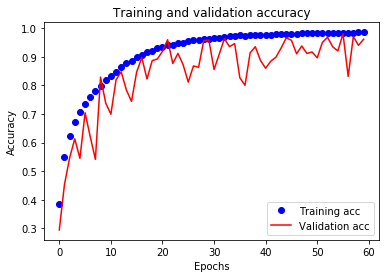

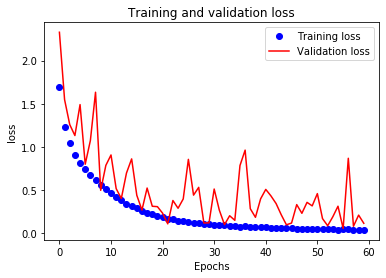

In [30]:
plot_train_val_acc(history)

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [32]:
from sklearn.metrics import accuracy_score
y_pred = best_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.744